<a href="https://colab.research.google.com/github/driansee/ml-learn/blob/main/ml-pemula/Latihan7_SKLearnK_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Latihan SKLearn K-means**

Pada latihan kali ini, Anda akan belajar membuat model unsupervised learning dengan teknik K-Means Clustering.

**Tahapan Latihan**

1. Konversi data menjadi Dataframe.
2. Lakukan preprocessing data.
3. Hilangkan kolom 'CustomerID' dan 'gender'.
4. Latih model K-Means.
5. Buat plot untuk Elbow dan Cluster.


Unggah dataset Mall_Customers.csv pada session storage Google Colab.[Tautan](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [57]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Ubah file Mall_Customers.csv menjadi dataframe
df = pd.read_csv('Mall_Customers.csv')

# Tampilkan 3 baris pertama
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [58]:
# Ubah nama kolom
df = df.rename(columns={'Gender': 'gender','Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

# Ubah data kategorik menjadi data numerik, Female = 0 dan Male = 1
df['gender'].replace(['Female', 'Male'], [0, 1], inplace=True)

# Tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


Text(0, 0.5, 'Inertia')

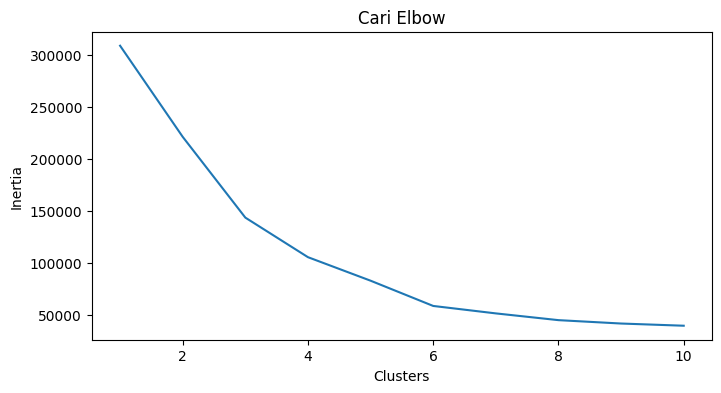

In [59]:
# Menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

# Membuat list yang berisi inertia
clusters= []
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init="auto").fit(X)
    clusters.append(km.inertia_)

%matplotlib inline

# Membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

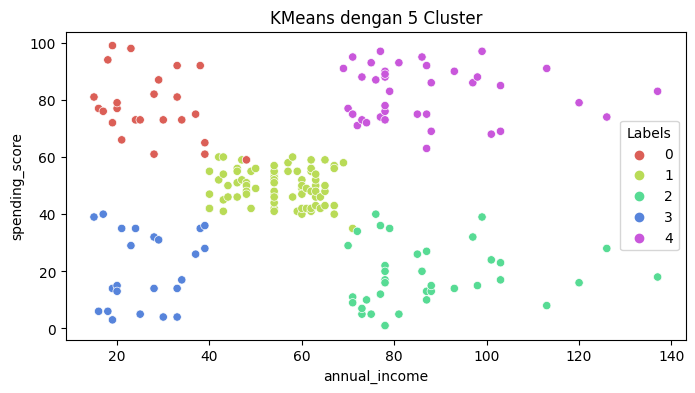

In [60]:
# Membuat objek KMeans
km5 = KMeans(n_clusters=5, n_init="auto").fit(X)

# Menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# Membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()